In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))
import scripts.visualizations as vis

In [2]:
training_data = pd.read_csv("../data/training_cleaned.csv")
test_data = pd.read_csv("../data/test_cleaned.csv")

 Distribution of Numerical Features


In [3]:
# Identify Categorical and Numerical Data
numerical_data = training_data.select_dtypes(include=['number'])
categorical_data = training_data.select_dtypes(include=['object'])

In [4]:
# Identify categorical and numerical clumns in the data 
print("Categorical data:", categorical_data.columns)
print("Numerical Data:", numerical_data.columns)

Categorical data: Index([], dtype='object')
Numerical Data: Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


Based on the output, the training dataset contains only numerical data, and no categorical data is present.

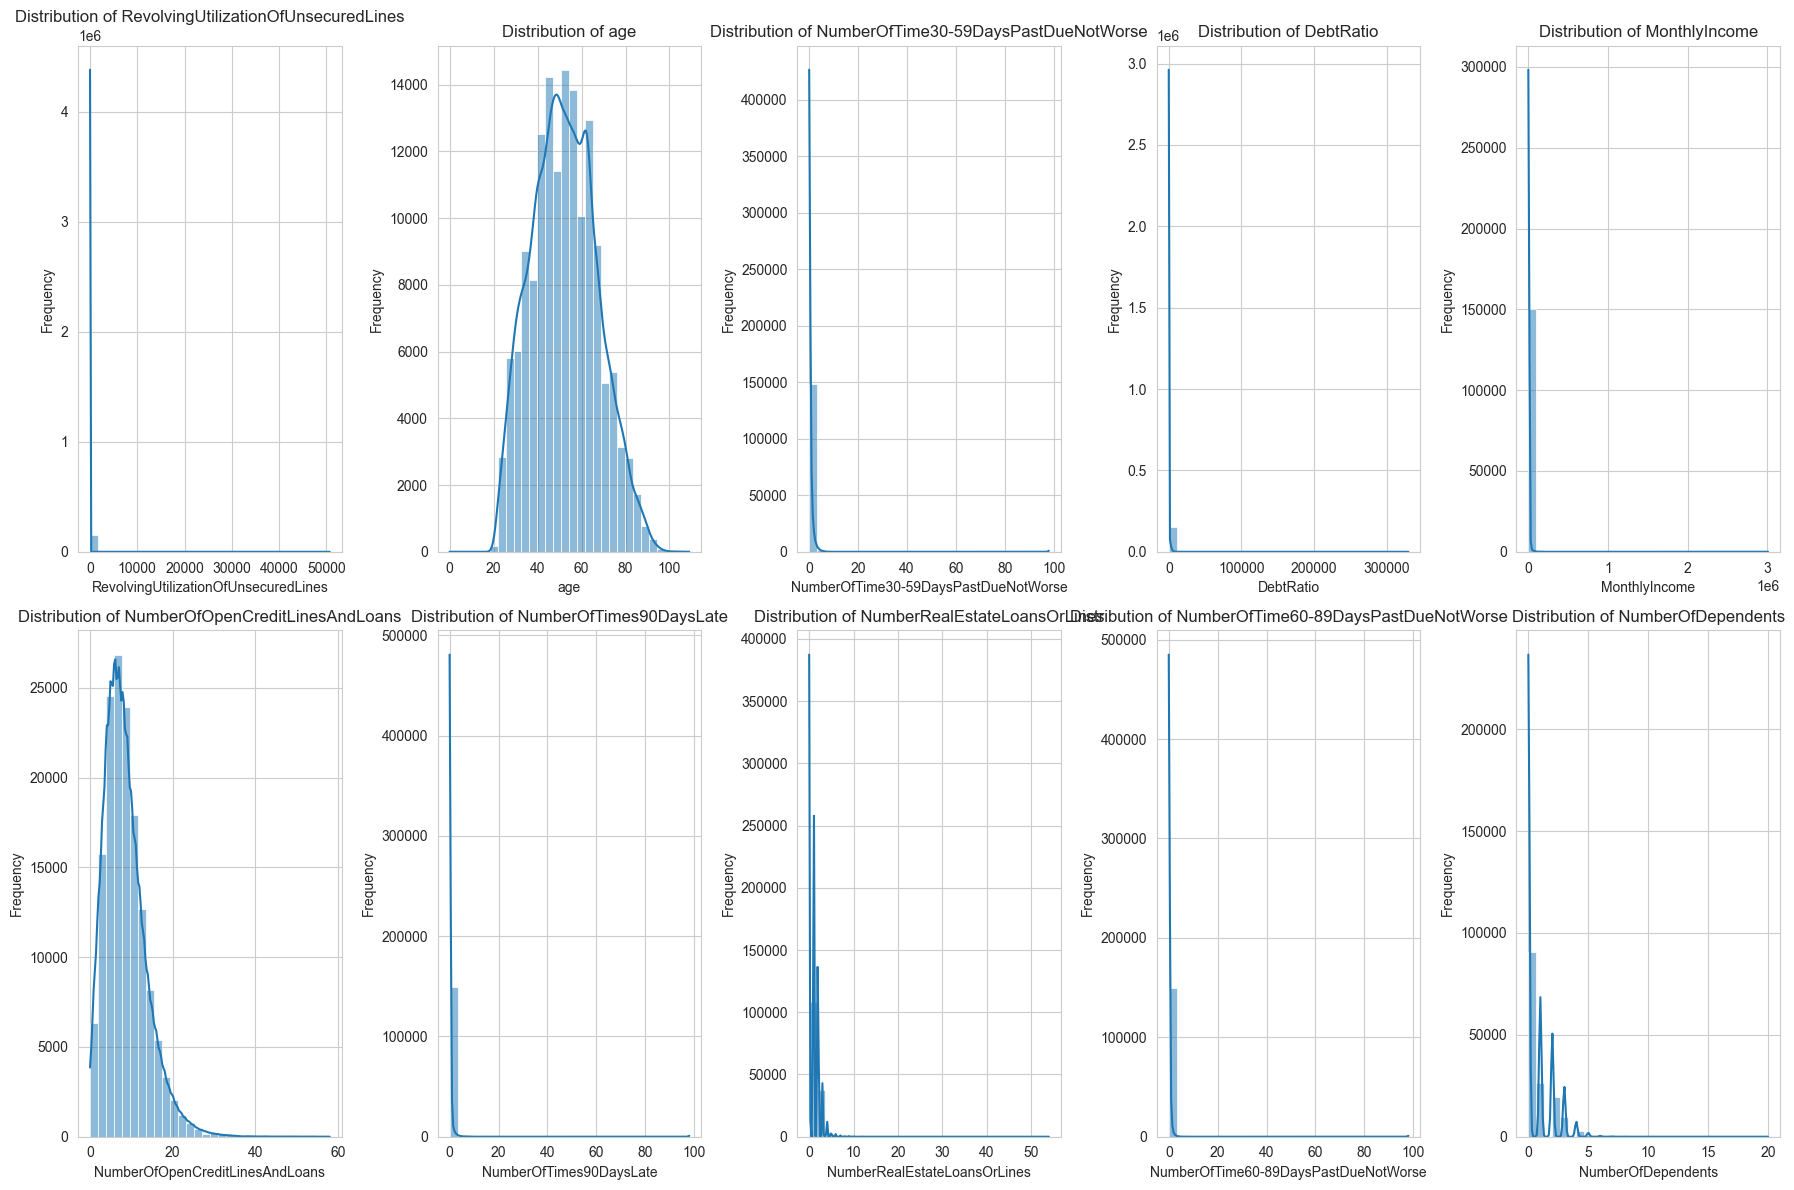

In [5]:
numerical_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
                     'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
# Distributions of numerical columns
vis.numerical_distribution(training_data, numerical_columns)

Correlation Analysis

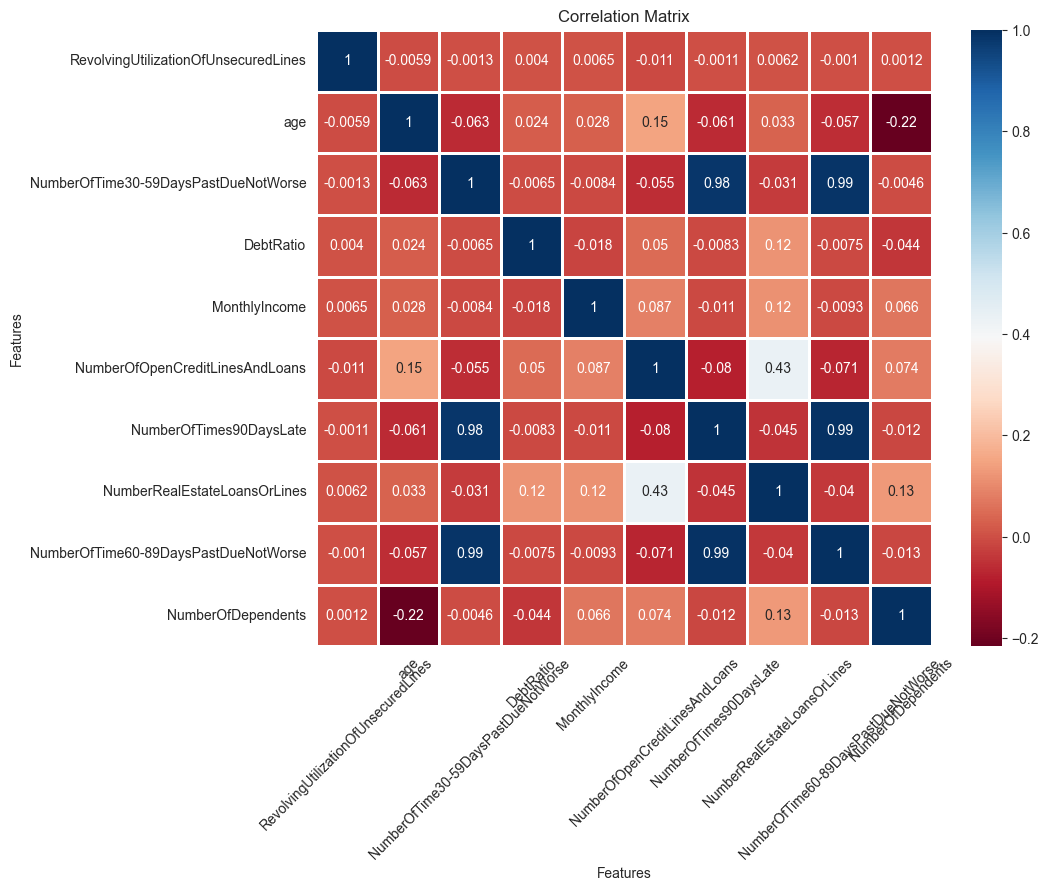

In [6]:
# Correlation analysis 
vis.correlation_analysis(training_data, numerical_columns)

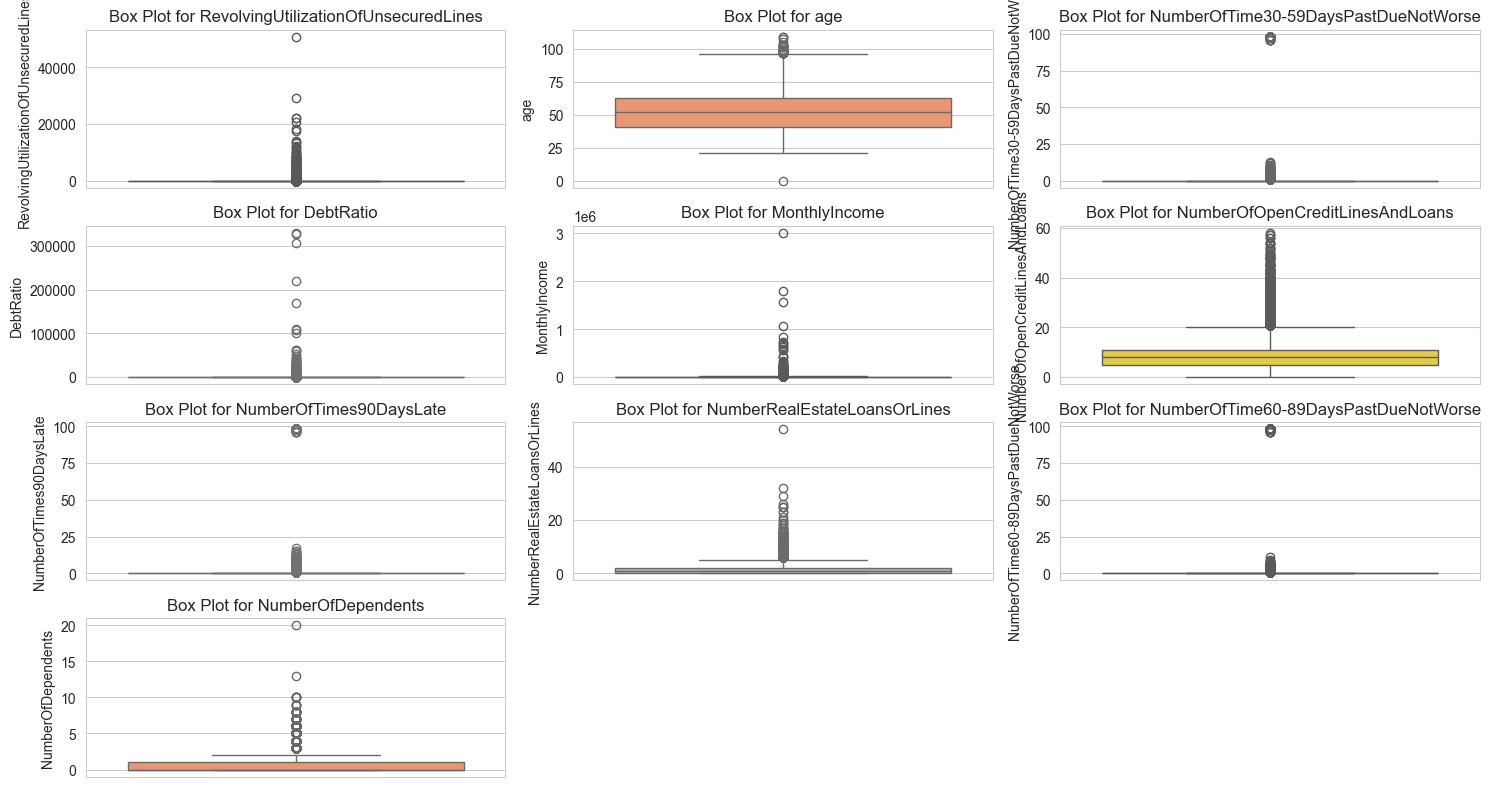

In [7]:
# Outlier detection
vis.outlier_detection(training_data, numerical_columns)

In [8]:
# Skewness detection
vis.detect_skewness(training_data, numerical_columns)

Skewness of numerical features:
MonthlyIncome                           127.120424
RevolvingUtilizationOfUnsecuredLines     97.630598
DebtRatio                                95.156841
NumberOfTime60-89DaysPastDueNotWorse     23.331510
NumberOfTimes90DaysLate                  23.087115
NumberOfTime30-59DaysPastDueNotWorse     22.596882
NumberRealEstateLoansOrLines              3.482449
NumberOfDependents                        1.626043
NumberOfOpenCreditLinesAndLoans           1.215302
age                                       0.188993
dtype: float64

Highly skewed features:
RevolvingUtilizationOfUnsecuredLines     97.630598
NumberOfTime30-59DaysPastDueNotWorse     22.596882
DebtRatio                                95.156841
MonthlyIncome                           127.120424
NumberOfOpenCreditLinesAndLoans           1.215302
NumberOfTimes90DaysLate                  23.087115
NumberRealEstateLoansOrLines              3.482449
NumberOfTime60-89DaysPastDueNotWorse     23.331510
NumberOfDe

RevolvingUtilizationOfUnsecuredLines     97.630598
NumberOfTime30-59DaysPastDueNotWorse     22.596882
DebtRatio                                95.156841
MonthlyIncome                           127.120424
NumberOfOpenCreditLinesAndLoans           1.215302
NumberOfTimes90DaysLate                  23.087115
NumberRealEstateLoansOrLines              3.482449
NumberOfTime60-89DaysPastDueNotWorse     23.331510
NumberOfDependents                        1.626043
dtype: float64

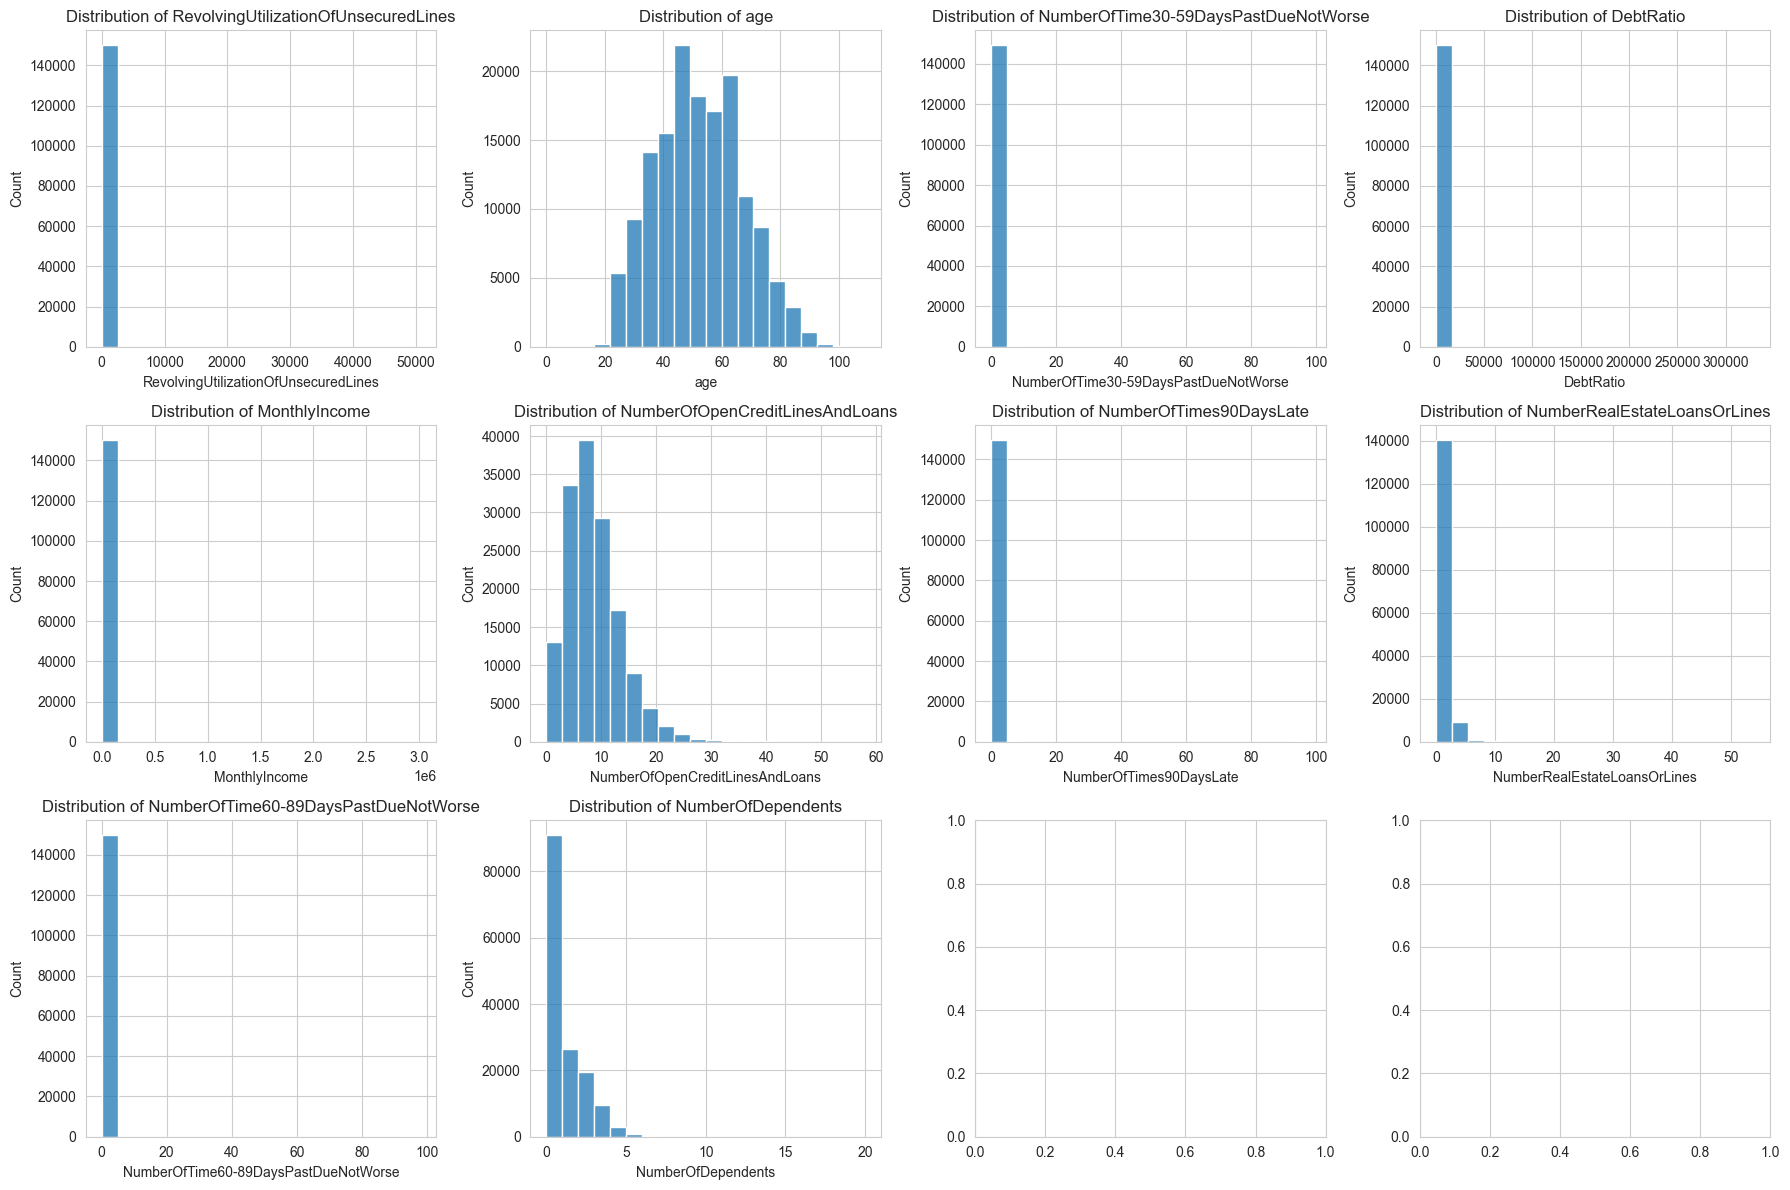

In [9]:
# Univariate analysis
vis.univariate_analysis(training_data, numerical_columns)

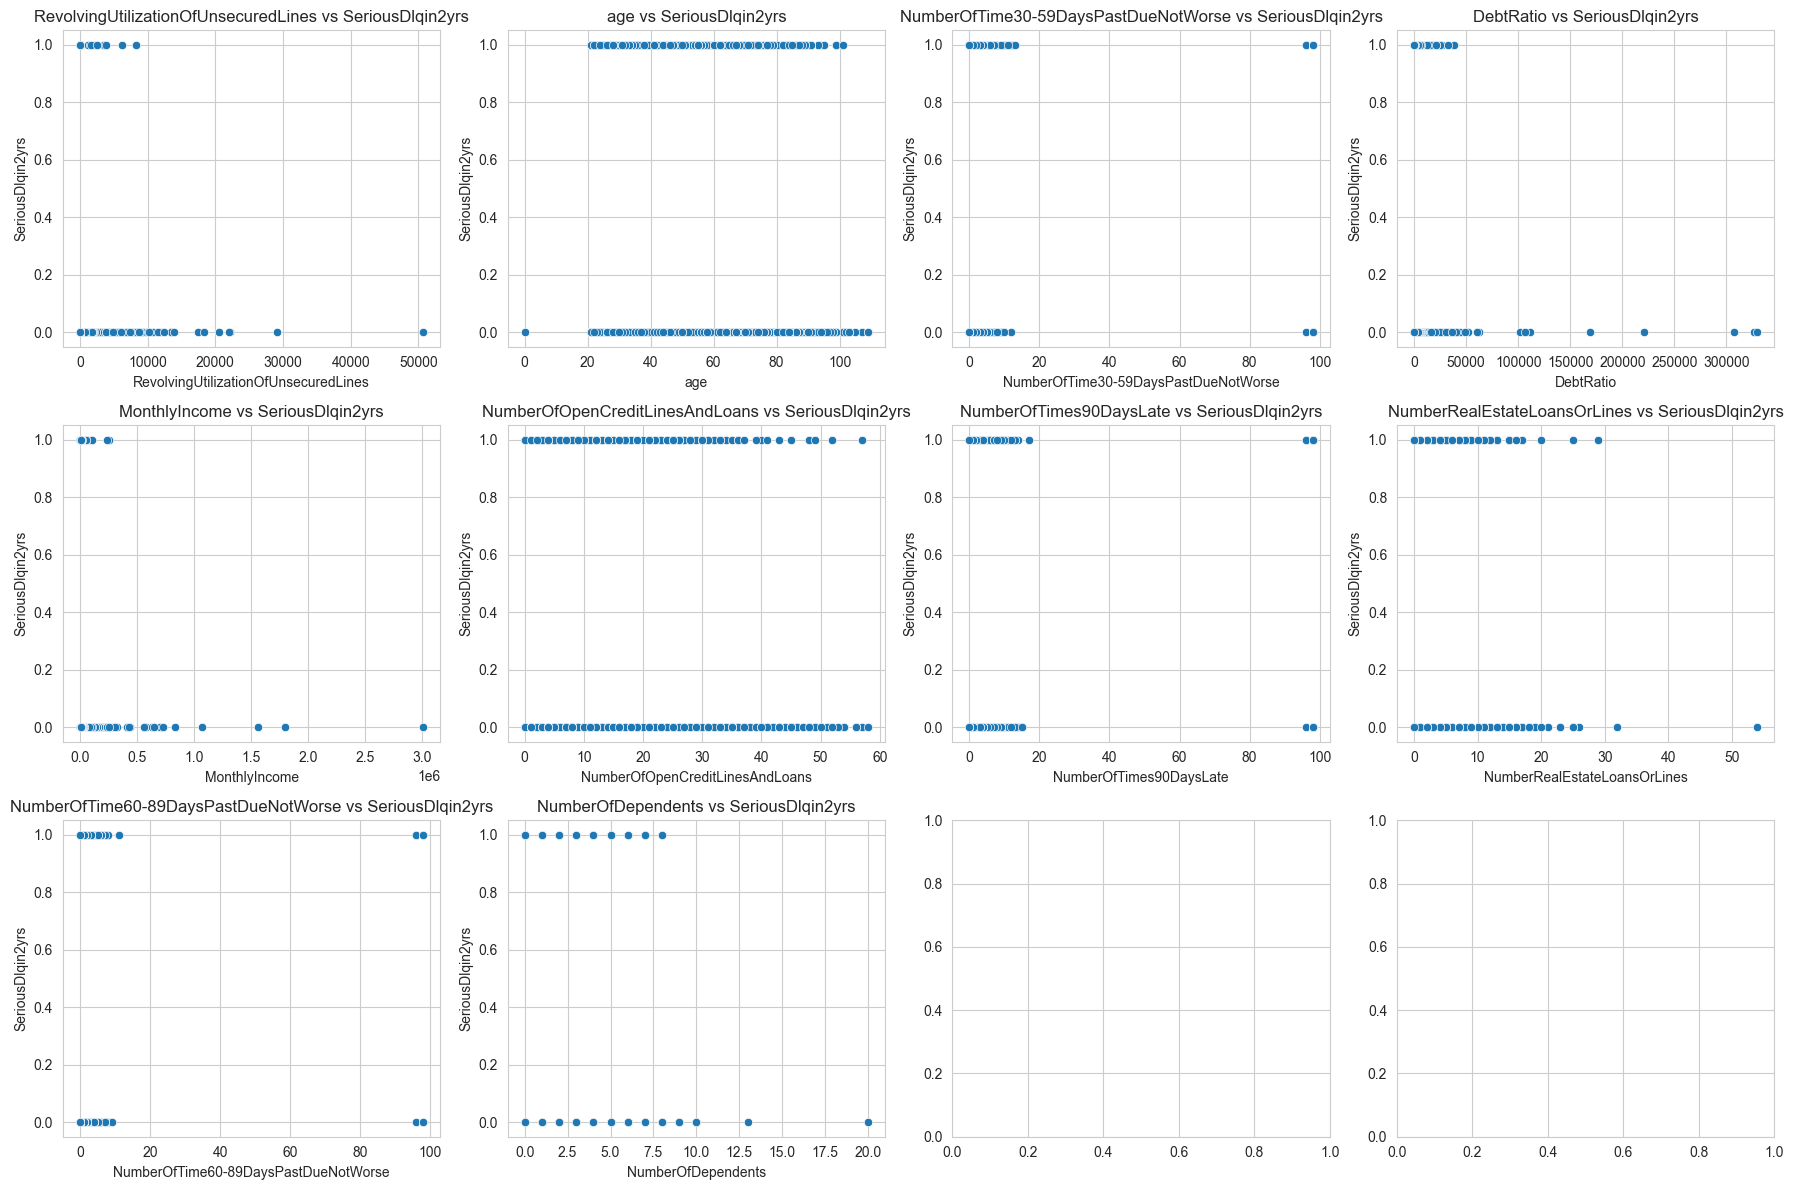

In [10]:
# Bivariate analysis 
vis.bivariate_analysis(training_data, numerical_columns, target_column='SeriousDlqin2yrs')

handling the outliers by removing outliers

In [13]:
from scipy.stats import zscore

# List of columns 
columns_to_check = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
                     'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
                     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# Calculate Z-scores for the specified columns
z_scores = training_data[columns_to_check].apply(zscore)

# Identify the outliers: any Z-score > 3 or < -3
outliers = (abs(z_scores) > 3)

# Filter out rows with outliers (optional)
outliers_data = training_data[outliers.any(axis=1)]  # Rows with outliers in any of the columns


In [14]:
outliers_data 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
44,0,0.368876,68,0,1687.500000,1.0,31,0,1,0,0.0
90,0,0.039388,51,0,15466.000000,0.0,7,0,0,0,0.0
111,0,0.318446,58,0,1.382629,3833.0,26,0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149884,0,0.806045,51,0,0.360048,5040.0,15,0,1,0,5.0
149893,0,0.000000,41,0,0.131958,25833.0,12,0,1,0,5.0
149899,0,0.235331,46,0,0.208149,12000.0,8,0,2,0,5.0
149916,0,0.253137,50,3,0.503715,9554.0,27,0,2,0,1.0


In [16]:
# Remove rows with outliers
df_no_outliers = training_data[~outliers.any(axis=1)]

In [18]:
# Save the cleaned datasets
df_no_outliers.to_csv('../data/training_cleaned_outlier.csv', index=False)